# Bug classifier

The purpose of this project was to gain some experience using fast.ai, this is my first attempt at creating an image classifier. For more information see fast.ai lesson 2 [here](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb).

## Generate dataset

In [1]:
from fastai import *
from fastai.vision import *

In [146]:
classes = ['bee','wasp','moth','ant']

path = Path('data/freid')
bug_path = Path(path/'bug')

if not os.path.exists(bug_path):
    os.makedirs(bug_path)

First, generate a list of image urls by executing a google image search and running the following code snippet:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Next, upload this datasets to the path directory and download the images:

In [48]:
download_images(path/'bee.txt', bug_path/'bee', max_pics=200)

In [49]:
download_images(path/'wasp.txt', bug_path/'wasp', max_pics=200)

In [98]:
download_images(path/'moth.txt', bug_path/'moth', max_pics=200)

In [147]:
download_images(path/'ant.txt', bug_path/'ant', max_pics=200)

Remove any images that can't be opened: 

In [148]:
for c in classes:
    print(c)
    verify_images(bug_path/c, delete=True)

## View data

In [149]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=12).normalize(imagenet_stats)

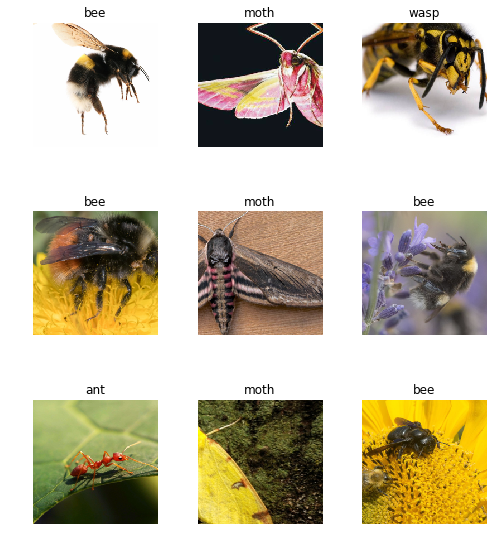

In [150]:
data.show_batch(rows=3, figsize=(7,8))

In [151]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ant', 'bee', 'moth', 'wasp'], 4, 303, 75)

## Train model

In [152]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [153]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.256846,0.260869,0.040000,00:10
1,0.747937,0.227081,0.093333,00:10
2,0.509939,0.254588,0.080000,00:11
3,0.389096,0.227287,0.080000,00:10


In [154]:
learn.save('stage-1')

In [155]:
learn.unfreeze()

In [156]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


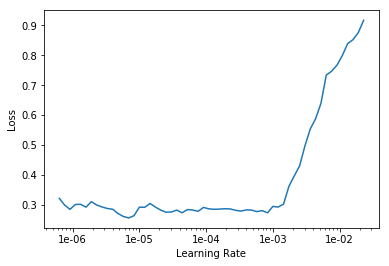

In [157]:
learn.recorder.plot()

Set lower slice value to the "Learning Rate" where "Loss" has the steepest descent.

In [158]:
learn.fit_one_cycle(2, max_lr=slice(1e-05,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.295583,0.240022,0.080000,00:10
1,0.243549,0.238509,0.066667,00:10


In [159]:
learn.save('stage-2')

## Interpretation

In [160]:
interp = ClassificationInterpretation.from_learner(learn)

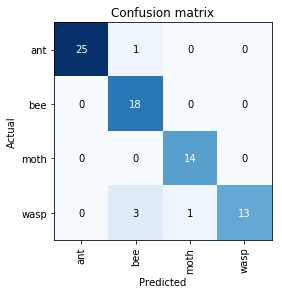

In [161]:
interp.plot_confusion_matrix()

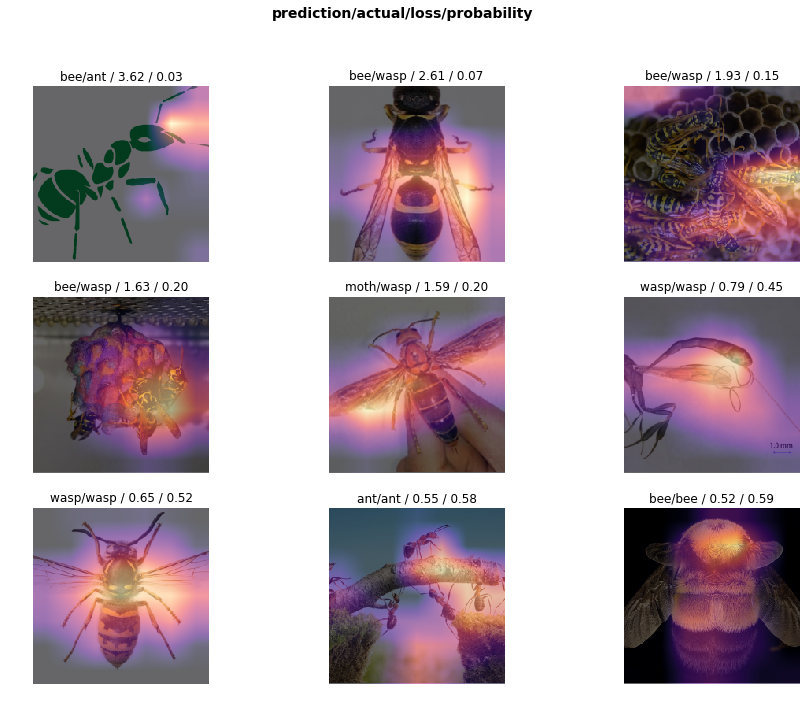

In [162]:
interp.plot_top_losses(9, figsize=(15,11))

In [164]:
interp.most_confused(min_val=2)

[('wasp', 'bee', 3)]

## Clean up

In [167]:
from fastai.widgets import *
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [169]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Save & export model

Saves ```.pth``` file in: ```path/models/``` and exports ```.pkl``` file in: ```path/```

In [86]:
learn.save("stag-3")

In [1]:
learn.export("bug.pkl")

NameError: name 'learn' is not defined

## Make prediction

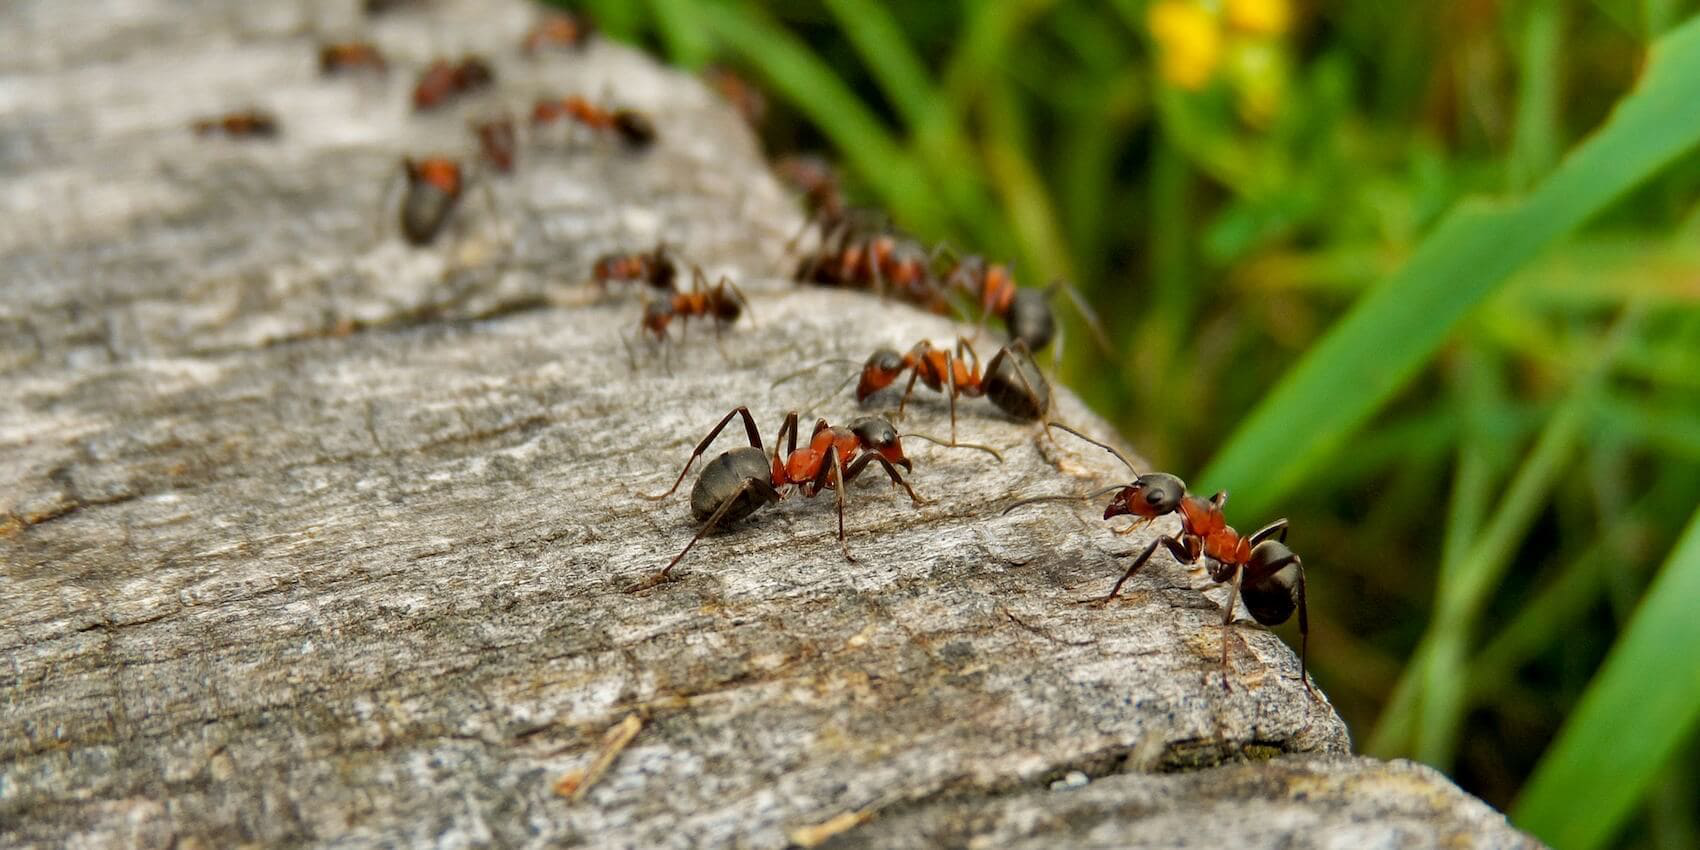

In [176]:
img = open_image(bug_path/'ant/00000021.jpg')
img

In [177]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category ant